# Méthodes itératives

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sys

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Notations
Attention : nous utiliserons dans la suite des notations légèrement différentes de celles du cours. 
Une matrice $A = (a_{i,j})\in\mathcal{M}_n(\mathbb{R})$ étant donnée, on désigne par $D_A$ la matrice formée par sa  diagonale, $U_A$ la matrice formée par sa partie triangulaire strictement supérieure et $L_A$ la matrice formée par sa partie triangulaire strictement inférieure :

\begin{equation}
D_A = \begin{pmatrix}
a_{1,1}&0&\ldots&0\\
0&a_{2,2}&\ddots&\vdots\\
\vdots & \ddots & \ddots & 0\\
0&\ldots&0&a_{n,n}
\end{pmatrix}
, \quad 
U_A = \begin{pmatrix}
0&a_{1,2}&\ldots&a_{1,n}\\
\vdots & \ddots &\ddots&\vdots\\
0&\ldots&\ddots&a_{n-1,n} \\
0 & \ldots & & 0
\end{pmatrix}
, \quad 
L_A = \begin{pmatrix}
0& &\ldots& 0\\
a_{2,1} & \ddots & &\vdots \\
\vdots & \ddots &\ddots&\vdots\\
a_{n,1}&\ldots&a_{n,n-1}&0
\end{pmatrix}
\end{equation}


## Rappels

Une matrice $A\in GL_n(\mathbb{R})$ et un vecteur $b\in\mathcal{M}_{n,1}(\mathbb{R})$ étant donnés, nous cherchons à résoudre le système linéaire $Ax = b$. Pour cela, nous supposons qu'il est possible de décomposer la matrice en une différence $A = M-N$ dans laquelle $M\in GL_n(\mathbb{R})$ est "facilement inversible". Pour un vecteur $x_0\in\mathcal{M}_{n,1}(\mathbb{R})$ donné, nous considérons alors la suite $(x_k)_{k\geq1}$ définie par la relation de récurrence

$$x_{k+1} = M^{-1}(Nx_k+b).$$

On appelle *résidu* l'erreur $r_k = b - Ax_k$. C'est cette quantité que l'on utilisera pour juger du moment où arrêter l'itération.

Nous rappelons également ce que nous appellerons, dans ce TP, la matrice du laplacien en dimension 1: $\Delta$ la matrice de taille $n$ donnée par

\begin{equation}
\Delta = (n+1)^2 \begin{pmatrix}
2&-1&0&\ldots&0\\
-1&2&-1&\ddots&\vdots\\
0 & \ddots & \ddots & \ddots & 0\\
\vdots& \ddots & -1& 2&-1\\
0&\ldots&0&-1&2
\end{pmatrix}.
\end{equation}

## Methode de Jacobi

La méthode de Jacobi est la méthode itérative définie par $M = D_A$ et $N = D_A - A$. A quelle condition la matrice $M$ est-elle inversible ?

**Question 1**

>+ Programmer une fonction `solve_diag` qui prend une matrice diagonale $D$ (un `numpy array` de dimension 2 et de forme $(n, n)$) et un vecteur $b$ (un `numpy array` de dimension 1) et renvoie la solution $x$ de $Dx=b$. 
>+ Programmer une fonction `Jacobi` qui prend en argument une matrice $A$, un vecteur $b$, une précision $\varepsilon$ et un nombre maximal d'itérations, et qui retourne la solution de $Ax=b$ lorsque le résidu $r_k$ est tel que 
$$\frac{\Vert r_k \Vert}{\Vert b\Vert} <\varepsilon.$$ 
On pourra prendre le vecteur nul pour $x_0$.
>+ Tester avec la matrice du laplacien pour $n=10$.

In [104]:
# METTRE VOTRE CODE ICI
def solve_diag(D,b):
    return b/np.diag(D)

def Jacobi(A,b,eps=10**-4,imax=3000):
    D=np.diag(np.diag(A))
    x=np.zeros(len(b))
    N=-A+D
    r=b-np.dot(A,x)
    i=0
    while (np.linalg.norm(r)/np.linalg.norm(b)>eps and i<imax):
        x=solve_diag(D,np.dot(N,x)+b)
        r=b-np.dot(A,x)
        i+=1
    if(i>=imax):
        print ("Maximum d'itération atteind")
    return x,i

N=10
Lap=((N+1)**2)*(2*np.eye(N,N)-np.eye(N,N,-1)-np.eye(N,N,1))
b=rd.rand(N)
print (Jacobi(Lap,b))

(array([0.01792616, 0.03338532, 0.04320467, 0.04869045, 0.05364927,
       0.05097142, 0.04806568, 0.03902773, 0.029676  , 0.01545058]), 221)


** Question 1, suite**

>+ Modifier la fonction précédente pour qu'elle renvoie le nombre d'itérations. Tester, puis dessiner le nombre d'itérations nécessaires pour traiter la matrice du laplacien pour les valeurs $n=2,4,8,\ldots, 2^6$.

[ 2  4  8 16 32 64]
14
44
147
526
1956
Maximum d'itération atteind
3000


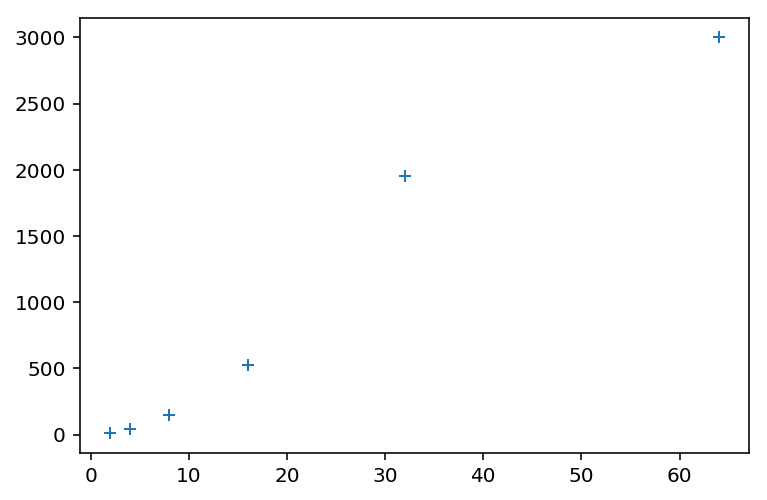

In [109]:
# METTRE VOTRE CODE ICI
N=np.arange(1,7)
N=2**N
print (N)
I=[]
for i in range(0,len(N)):
    Lap=((N[i]+1)**2)*(2*np.eye(N[i],N[i])-np.eye(N[i],N[i],-1)-np.eye(N[i],N[i],1))
    b=rd.rand(N[i])
    X,i=Jacobi(Lap,b)
    print(i)
    I.append(i)
    
plt.plot(N,I,'+')

# Méthode de Gauss-Seidel

Pour cette méthode, on a $M = D_A+L_{A}$ et $N = -U_A$. A quelle condition la matrice $M$ est-elle inversible ?

**Question 2**

>+ Programmer une fonction `solve_tril` qui prend une matrice triangulaire inférieure $L$ (un `numpy array` de dimension 2 et de forme $(n,n)$), un vecteur $b$ (un `numpy array` de dimension 1) et un nombre maximal d'itérations, et renvoie la solution $x$ de $Lx=b$. 
>+ Programmer une fonction `GaussS` qui prend en argument une matrice $A$, un vecteur $b$ et une précision $\varepsilon$ et qui retourne la solution de $Ax=b$ lorsque le résidu $r_k$ est tel que 
$$\frac{\Vert r_k \Vert}{\Vert b\Vert} <\varepsilon.$$ 
On utilisera `solvie_tril` pour résoudre le système triangulaire.
>+ Tester avec la matrice du laplacien pour $n=10$.


In [131]:
# METTRE VOTRE CODE ICI
def solve_triL(L,b):
    n,m=L.shape
    x=np.zeros(n)
    i=0
    while (i<n) :
        k=0
        S=0
        while (k<i):
            S=S+L[i,k]*x[k]
            k=k+1
        x[i]=(b[i]-S)/L[i,i]
        i=i+1
    return x

def GaussS(A,b,eps=10**-4,imax=3000):
    D=np.diag(np.diag(A))
    M=np.tril(A)
    x=np.zeros(len(b))
    N=M-A
    r=b-np.dot(A,x)
    i=0
    while (np.linalg.norm(r)/np.linalg.norm(b)>eps and i<imax):
        x=solve_triL(M,np.dot(N,x)+b)
        r=b-np.dot(A,x)
        i+=1
    if(i>=imax):
        print ("Maximum d'itération atteind")
    return x,i

N=10
Lap=((N+1)**2)*(2*np.eye(N,N)-np.eye(N,N,-1)-np.eye(N,N,1))
b=rd.rand(N)
print (GaussS(Lap,b))

(array([0.02522692, 0.04328537, 0.0548432 , 0.06368186, 0.06707657,
       0.06906468, 0.06484242, 0.05612968, 0.04211686, 0.0227173 ]), 111)


** Question 2, suite **

>+ Modifier la fonction précédente pour qu'elle renvoie le nombre d'itérations. Tester, puis dessiner le nombre d'itérations nécessaires pour traiter la matrice du laplacien pour les valeurs $n=2,4,8, \ldots, 2^6$.
>+ Comparer avec la méthode de Jacobi.

[ 2  4  8 16 32 64]
7
23
74
266
995
Maximum d'itération atteind
3000


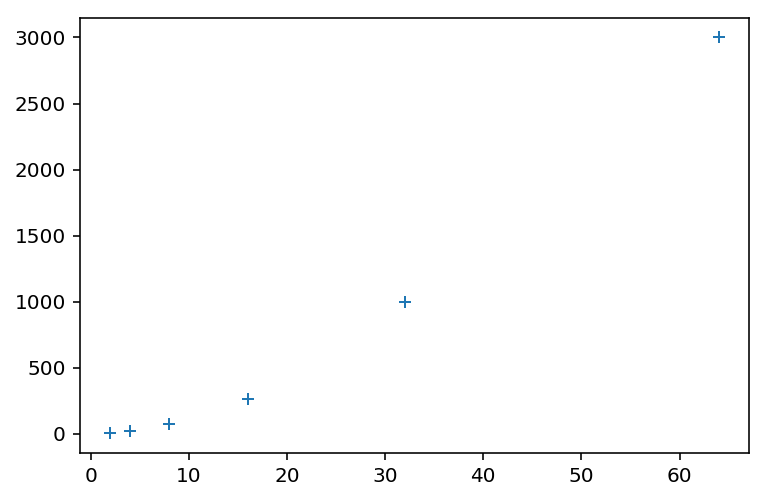

In [132]:
# METTRE VOTRE CODE ICI
N=np.arange(1,7)
N=2**N
print (N)
I=[]
for i in range(0,len(N)):
    Lap=((N[i]+1)**2)*(2*np.eye(N[i],N[i])-np.eye(N[i],N[i],-1)-np.eye(N[i],N[i],1))
    b=rd.rand(N[i])
    X,i=GaussS(Lap,b)
    print(i)
    I.append(i)
    
plt.plot(N,I,'+')

# Méthode de relaxation

Cette méthode dépend d'un paramètre $\omega > 0$ et prend pour matrices :

$$
M = \tfrac{D_A}{\omega} + L_A\qquad N = \tfrac{1-\omega}{\omega} D_A - U_A
.$$

Lorsque $\omega>1$, on parle de méthode SOR. C'est l'acronyme "Successive Over-Relaxation", en français méthode de sur-relaxation successive.

**Question 3**
>+ Programmer une fonction `SOR` qui prend en argument une matrice $A$, un vecteur $b$, un paramètre $\omega$, une précision $\varepsilon$, un nombre maximal d'itérations, et qui retourne la solution de $Ax=b$ lorsque le résidu $r_k$ est tel que 
$$\frac{\Vert r_k \Vert}{\Vert b\Vert} <\varepsilon.$$ 
On utilisera `solvie_tril` pour résoudre le système triangulaire.
>+ Tester avec la matrice du laplacien pour $n=10$ et différentes valeurs de $\omega$.

In [159]:
# METTRE VOTRE CODE ICI
def SOR(A,b,w,eps=10**-4,imax=3000):
    D=np.diag(np.diag(A))
    Dw=D/w
    M=D+np.tril(A,-1)
    Mw=Dw+np.tril(A,-1)
    x=np.zeros(len(b))
    N=(1-w)*Dw+(M-A)
    r=b-np.dot(A,x)
    i=0
    while (np.linalg.norm(r)/np.linalg.norm(b)>eps and i<imax):
        x=solve_triL(Mw,np.dot(N,x)+b)
        r=b-np.dot(A,x)
        i+=1
    if(i>=imax):
        print ("Maximum d'itération atteind")
    return x,i

N=20
w=1.98
Lap=((N+1)**2)*(2*np.eye(N,N)-np.eye(N,N,-1)-np.eye(N,N,1))
b=rd.rand(N)
print (SOR(Lap,b,w))
print (np.linalg.solve(Lap,b))

(array([0.0152416 , 0.02837937, 0.04011242, 0.04973926, 0.05809703,
       0.06474747, 0.06995209, 0.07482758, 0.0780971 , 0.07920098,
       0.07860283, 0.07586877, 0.07165843, 0.06633583, 0.06016294,
       0.05301955, 0.04409593, 0.03390626, 0.02310038, 0.01197857]), 462)
[0.01524254 0.02838116 0.04011505 0.04974263 0.05810111 0.06475216
 0.06995733 0.07483339 0.07810339 0.07920757 0.0786096  0.07587553
 0.07166502 0.06634214 0.06016884 0.05302492 0.04410054 0.03390994
 0.02310297 0.01197995]


** Question 3, suite**

>+ Tester la méthode sur la matrice du Laplacien pour $n=20$ et représenter sur un graphique le nombre d'opérations en fonction de $\omega$. Qu'observe-t-on ? Cette tendance se confirme-t-elle pour d'autres valeurs de $n$ ?
>+ Tester différentes valeurs de $\omega$ non uniformément réparties sur l'intervalle $]0,2[$ et tracer le logarithme du nombre d'itérations.

[0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.025 1.05
 1.075 1.1   1.125 1.15  1.175 1.2   1.225 1.25  1.275 1.3   1.325 1.35
 1.375 1.4   1.425 1.45  1.475 1.5   1.525 1.55  1.575 1.6   1.625 1.65
 1.675 1.7   1.725 1.75  1.775 1.8   1.81  1.82  1.83  1.84  1.85  1.86
 1.87  1.88  1.89  1.9   1.91  1.92  1.93  1.94  1.95  1.96  1.97  1.98
 1.99 ]
Maximum d'itération atteind
Maximum d'itération atteind


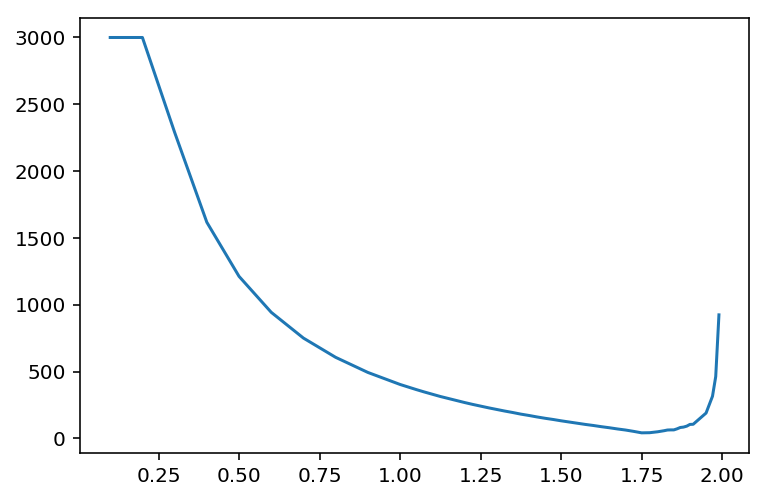

In [164]:
# METTRE VOTRE CODE ICI
w = np.concatenate((np.arange(0.1,1.,0.1), np.arange(1., 1.8, 0.025), np.arange(1.8,2,0.01)))
it = np.zeros(w.size)
print(w)
N=20
b=rd.rand(N)
I=[]
for i in range(0,len(w)):
    Lap=((N+1)**2)*(2*np.eye(N,N)-np.eye(N,N,-1)-np.eye(N,N,1))
    X,i=SOR(Lap,b,w[i])
    I.append(i)
    
plt.plot(w,I)

** Question 3, suite**
>+ Comparer les trois méthodes pour $n=100$ et $\omega = 2-\tfrac{2\pi}{n}$.

In [163]:
N=100
w=2-2*np.pi/N
Lap=((N+1)**2)*(2*np.eye(N,N)-np.eye(N,N,-1)-np.eye(N,N,1))
b=rd.rand(N)
X,i=Jacobi(Lap,b)
print (i)
X,i=GaussS(Lap,b)
print (i)
X,i=SOR(Lap,b,w)
print (i)

Maximum d'itération atteind
3000
Maximum d'itération atteind
3000
236


In [ ]:
# METTRE VOTRE CODE ICI


## Matrice du Laplacien en dimension 2

Enfin, afin de corser les choses, nous introduisons aussi la matrice $\Delta_2 = (d_{k,l})$ du laplacien en dimension 2. C'est une matrice à $n^2$ lignes et $n^2$ colonnes. Notons $k=i+jn$ la division euclidienne de $k$ par $n$ ($i,j$ sont entre entre 0 et $n-1$), on a alors :
\begin{equation}
\frac{d_{k,l}}{(n+1)^2} = \frac{d_{i+jn,l}}{(n+1)^2}
\begin{cases}
4 & \text{si $l=k$,} \\
-1 & \text{si $k=l-1$ et $i>0$,} \\
-1 & \text{si $k=l+1$ et $i<n-1$,} \\
-1 & \text{si $k=l+n$ et $j>0$,} \\
-1 & \text{si $k=l+n$ et $j<n-1$,} \\
0 & \text{sinon} 
\end{cases}
\end{equation}


**Question 4**
+ Tester vos différentes méthodes. On étudiera à nouveau la vitesse de convergence de la méthode SOR en fonction de $\omega$ et la vitesse de convergence des trois méthodes en fonction de $n$. Attention à ne pas prendre des valeurs de $n$ trop grandes où vos calculs pourraient devenir très long.

In [167]:
# METTRE VOTRE CODE ICI
def Laplacien2D(n):
    A = np.zeros((n*n,n*n))
    dummy = (n+1)**2
    def k2ij(k):
        return k//n, k%n
    def ij2k(i, j):
        return i*n + j
    for k in range(n*n):
        i, j = k2ij(k)
        A[k, k] = 4*dummy
        #print('k = {2} => i={0}, j={1} -> '.format(i, j, k))
        for d in [-1, 1]:
            if i+d < n and i+d >= 0:
                kd = ij2k(i+d, j)
                A[k, kd] = -dummy
                #print('\tvx = {0} => k = {1}'.format(i+d, kd))
            if j+d < n and j+d >= 0:
                kd = ij2k(i, j+d)
                A[k, kd] = -dummy
                #print('\tvy = {0} => k = {1}'.format(j+d, kd))
    return A

print(Laplacien2D(3))

[[ 64. -16.   0. -16.   0.   0.   0.   0.   0.]
 [-16.  64. -16.   0. -16.   0.   0.   0.   0.]
 [  0. -16.  64.   0.   0. -16.   0.   0.   0.]
 [-16.   0.   0.  64. -16.   0. -16.   0.   0.]
 [  0. -16.   0. -16.  64. -16.   0. -16.   0.]
 [  0.   0. -16.   0. -16.  64.   0.   0. -16.]
 [  0.   0.   0. -16.   0.   0.  64. -16.   0.]
 [  0.   0.   0.   0. -16.   0. -16.  64. -16.]
 [  0.   0.   0.   0.   0. -16.   0. -16.  64.]]


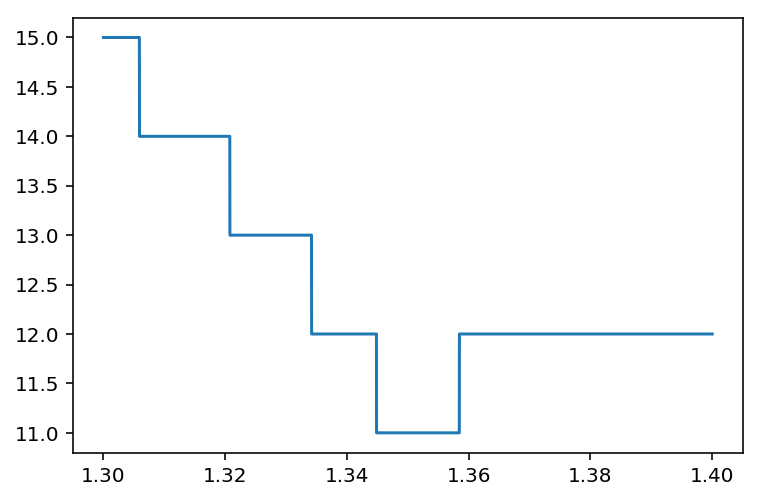

In [191]:
N=5
w = ( np.arange(1.3, 1.4, 0.00001))
A=Laplacien2D(N)
b=rd.rand(N*N)
I=[]
for i in range(0,len(w)):
    X,i=SOR(A,b,w[i])
    I.append(i)
    
plt.plot(w,I)

1
1
9
14
8
10
27
14
11
43
23
11
63
32
11
87
45
19
113
57
25
144
73
33
180
91
42
216
109
51


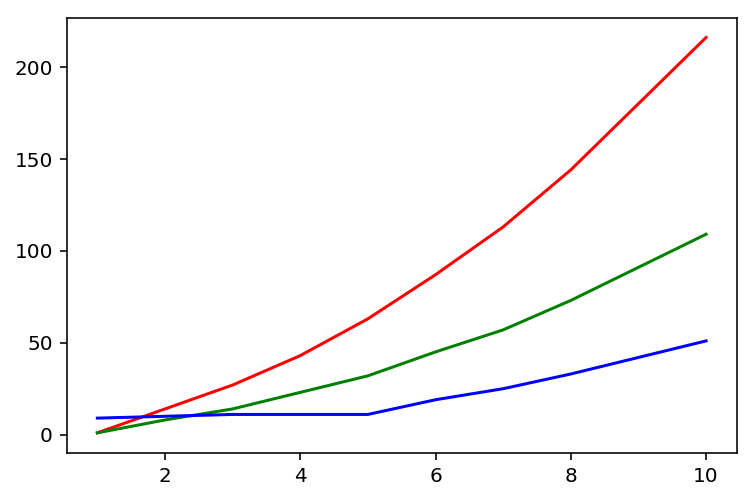

In [194]:
N=np.arange(1,11)
I1=[]
I2=[]
I3=[]
w=1.35
for i in range(0,len(N)):
    A=Laplacien2D(N[i])
    b=rd.rand(N[i]**2)
    X1,i1=Jacobi(A,b)
    X2,i2=GaussS(A,b)
    X3,i3=SOR(A,b,w)
    print(i1)
    I1.append(i1)
    print(i2)
    I2.append(i2)
    print(i3)
    I3.append(i3)
    
plt.plot(N,I1,'r')
plt.plot(N,I2,'g')
plt.plot(N,I3,'b')